# Multi Layer Perceptron

In [ ]:
path=  'C:/Users/felipe/Documents/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/Documents/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [1]:
path=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [2]:
from base_regressor import BaseRegressor
from Plotter import Plotter

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.preprocessing import StandardScaler


# Definir el wrapper para MLPRegressor
class MLPWrapper(BaseEstimator, RegressorMixin):
    def __init__(self,
                 layer1=None,
                 layer2=None,
                 num_hl=None,
                 batch_size=None,
                 activation=None,
                 solver=None,
                 learning_rate=None,
                 learning_rate_init=None,
                 alpha=None):
        self.layer1 = layer1
        self.layer2 = layer2
        self.num_hl = num_hl
        self.batch_size = batch_size
        self.activation = activation
        self.solver = solver
        self.learning_rate = learning_rate
        self.learning_rate_init = learning_rate_init
        self.alpha = alpha

    def fit(self, x_train, y_train):
        model_mlp = MLPRegressor(
            hidden_layer_sizes=[self.layer1, self.layer2][-1*self.num_hl:],
            max_iter=300,
            activation=self.activation,
            batch_size=self.batch_size,
            solver=self.solver,
            learning_rate=self.learning_rate,
            learning_rate_init=self.learning_rate_init,
            alpha=self.alpha
        )
        model_mlp.fit(x_train, y_train)
        self.model = model_mlp
        return self

    def predict(self, x_train):
        return self.model.predict(x_train)

    def score(self, x_train, y_train):
        return self.model.score(x_train, y_train)
    


class MLPRegressorCustom(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="MLP"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = MLPWrapper
        if params is None:
            self.params = {
                'layer1': 100,
                'layer2': 50,
                'num_hl': 1,
                'batch_size': 32,
                'activation': 'tanh',
                'solver': 'adam',
                'alpha': 0.0001,
                'learning_rate': 'adaptive',
                'learning_rate_init': 0.001,
                'max_iter': 200
            }
        if params_space is None:
            self.params_space = {
                'layer1': Integer(1000, 2000),
                'layer2': Integer(300, 1000),
                'num_hl': Integer(1, 2),
                'batch_size': Categorical([8, 32, 128, 256, 512]),
                'activation': Categorical(['relu', 'tanh', 'logistic']),
                'solver': Categorical(['adam', 'lbfgs', 'sgd']),
                'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
                'learning_rate': Categorical(['constant', 'adaptive', 'invscaling']),
                'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform')
            }

        self.scaler=StandardScaler()


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = MLPRegressorCustom()
Plotters = Plotter()

In [4]:
# Parametros de Plot
colorset = 'blue'
nameset = 'MLP'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=2


In [5]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [ ]:
with open(f'results_model/opt_model.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [7]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

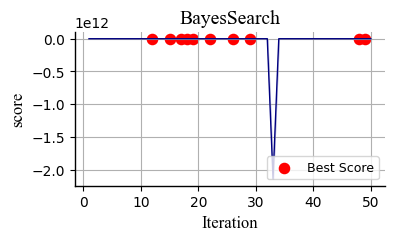

Top 1: Iteration 26, Score -12.621715333314304
Top 2: Iteration 18, Score -12.622072729666408
Top 3: Iteration 29, Score -12.695124505936091
Top 4: Iteration 15, Score -12.722168564463093
Top 5: Iteration 17, Score -12.750763005019513
Top 6: Iteration 22, Score -12.806255413463102
Top 7: Iteration 19, Score -12.808617050981084
Top 8: Iteration 12, Score -12.929290049800693
Top 9: Iteration 48, Score -13.271879789762057
Top 10: Iteration 49, Score -13.29970374677581


In [8]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [9]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'activation': 'logistic',
  'alpha': 1e-05,
  'batch_size': 8,
  'layer1': 2000,
  'layer2': 300,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver': 'adam'},
 {'activation': 'logistic',
  'alpha': 0.01,
  'batch_size': 8,
  'layer1': 1299,
  'layer2': 431,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver': 'adam'},
 {'activation': 'logistic',
  'alpha': 1e-05,
  'batch_size': 8,
  'layer1': 1534,
  'layer2': 300,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver': 'adam'},
 {'activation': 'logistic',
  'alpha': 0.0003943668902789238,
  'batch_size': 8,
  'layer1': 1881,
  'layer2': 300,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver': 'adam'},
 {'activation': 'logistic',
  'alpha': 1e-05,
  'batch_size': 8,
  'layer1': 2000,
  'layer2': 300,
  'learning_rate': 'invscaling',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver

# Training 1-Iteration 10Kfold 80%train 20%test


Se divide el set de datos en 80% entrenamiento y 20% para prueba

In [13]:
from sklearn.model_selection import train_test_split
# Dividir el dataframe
df_train, df_test = train_test_split(df_concatenado_CN, test_size=0.2, random_state=42)

# Resultado: df_train y df_test son dataframes


In [ ]:
results_labels_df_CN_train, results_labels_df_CN_val, results_labels_patient, results_model, results_per_fold_CN_train, results_per_fold_CN_val, results_per_fold_patient= model.trainer(df_CN=df_train, n_splits=10, n_iterations=1, params_=best_params_[0], scaler=Scaler)

C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:233: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([results_labels_df_CN_train, temp_CN_df_train], ignore_index=True)
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:235: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_te

In [10]:
with open('results_model/resultados_modelo_simple.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Acceder a los objetos
results_labels_df_CN_train, results_labels_df_CN_val, results_labels_patient, results_model, results_per_fold_CN_train, results_per_fold_CN_val, results_per_fold_patient = loaded_results

# Test

In [11]:
import pandas as pd
from scipy.stats import linregress


def process_test_data(df_train, df_test, results_model,results_per_fold_train, n_folds=10 ,feature_col_range= slice(None, -2),scaler=2):
   
    X_test = df_test.iloc[:, :-2]  # Features
    y_test = df_test.iloc[:, -2]   # Labels (Age)
    ID_test = df_test.iloc[:, -1]  # Unique IDs

    # DataFrame para almacenar los resultados generales
    results_labels_df_CN_test = pd.DataFrame(columns=['y_labels', 'y_pred', 'y_pred_corrected', 'GAP', 'GAP_corrected', 'ID-unique'])
    results_per_fold_CN_test = []

    for fold in range(n_folds):
        # Train
        ID_train_fold = results_per_fold_train[fold]['ID-unique']
        df_train_fold = df_train[df_train['ID-unique'].isin(ID_train_fold)]
        X_train_kf = df_train_fold.iloc[:, feature_col_range]  # Features
        y_train_kf = df_train_fold.iloc[:, -2]  # Labels

        #slope = results_model['slope'][fold]
        #intercept = results_model['intercept'][fold]
        #mean_X_train_kf = results_model['mean_X_train_kf'][fold]
        #std_X_train_kf = results_model['std_X_train_kf'][fold]
        
        if scaler == 1:
            # No escalar
            X_train_kf_scaled = X_train_kf
            X_test_CN_scaled = X_test
        elif scaler == 2:
            # Z-score scaling
            mean_X_train_kf = X_train_kf.mean()
            std_X_train_kf = X_train_kf.std()
            X_train_kf_scaled = (X_train_kf - mean_X_train_kf) / std_X_train_kf
            X_test_CN_scaled = (X_test - mean_X_train_kf) / std_X_train_kf
        elif scaler == 3:
            # MinMax scaling (manual)
            min_X_train_kf = X_train_kf.min()
            max_X_train_kf = X_train_kf.max()
            X_train_kf_scaled = (X_train_kf - min_X_train_kf) / (max_X_train_kf - min_X_train_kf)
            X_test_CN_scaled = (X_test - min_X_train_kf) / (max_X_train_kf - min_X_train_kf)


        # Escalado de los datos de prueba
        #X_test_CN_scaled = (X_test - mean_X_train_kf) / std_X_train_kf

        # Obtener el modelo del fold actual
        model_ = results_model['model'][fold]

        y_pred_CN_train = model_.predict(X_train_kf_scaled)
        gap_CN_train = y_pred_CN_train - y_train_kf



        # Predicción
        y_pred_CN_test = model_.predict(X_test_CN_scaled)
        gap_CN_test = y_pred_CN_test - y_test

        slope, intercept, _, _, _ = linregress(y_train_kf, gap_CN_train)


        # Corrección de la predicción
        y_pred_corrected_CN_test = y_pred_CN_test - (slope * y_test + intercept)
        corrected_gap_CN_test = gap_CN_test - (slope * y_test + intercept)

        # Crear un DataFrame temporal con los resultados
        temp_CN_df_test = pd.DataFrame({
            'y_labels': y_test,
            'y_pred': y_pred_CN_test,
            'y_pred_corrected': y_pred_corrected_CN_test,
            'GAP': gap_CN_test,
            'GAP_corrected': corrected_gap_CN_test,
            'ID-unique': y_test
        })

        # Concatenar los resultados del fold al DataFrame general
        results_labels_df_CN_test = pd.concat([results_labels_df_CN_test, temp_CN_df_test], ignore_index=True)
        results_per_fold_CN_test.append(temp_CN_df_test.copy())

    return results_labels_df_CN_test, results_per_fold_CN_test


In [14]:
results_labels_df_CN_test, results_per_fold_CN_test = process_test_data(df_train,df_test, results_model,results_per_fold_CN_train, scaler=Scaler)


C:\Users\felipe\AppData\Local\Temp\ipykernel_18164\1818162526.py:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_test, temp_CN_df_test], ignore_index=True)


# Evaluación del modelo

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lista de métricas
#metrics = ['mae', 'mse', 'rmse', 'r2']

# Diccionario para almacenar los resultados
#results = {'train': {m: [] for m in metrics}, 
#           #'val': {m: [] for m in metrics}, 
#           'test': {m: [] for m in metrics}}

metrics = ['mae', 'mse', 'rmse', 'r2']
results = {'train': {m: [] for m in metrics}, 
        'val': {m: [] for m in metrics}, 
        'test': {m: [] for m in metrics}}

# Función para calcular las métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}

# Recorrer los 10 folds
for fold_idx in range(10):
    fold_data_CN_train = results_per_fold_CN_train[fold_idx]
    fold_data_CN_val = results_per_fold_CN_val[fold_idx]
    fold_data_CN_test = results_per_fold_CN_test[fold_idx]

    # Obtener los valores de y_labels e y_pred_corrected
    y_true_1 = fold_data_CN_train['y_labels']
    y_pred_1 = fold_data_CN_train['y_pred']
    y_true_2 = fold_data_CN_val['y_labels']
    y_pred_2 = fold_data_CN_val['y_pred']
    y_true_3 = fold_data_CN_test['y_labels']
    y_pred_3 = fold_data_CN_test['y_pred']
    
    # Calcular métricas para el fold actual
    fold_metrics_1 = calculate_metrics(y_true_1, y_pred_1)
    fold_metrics_2 = calculate_metrics(y_true_2, y_pred_2)
    fold_metrics_3 = calculate_metrics(y_true_3, y_pred_3)

    # Guardar los resultados en el diccionario
    for metric in metrics:
        results['train'][metric].append(fold_metrics_1[metric])
        results['val'][metric].append(fold_metrics_2[metric]) 
        results['test'][metric].append(fold_metrics_3[metric]) 

# Imprimir resultados
#for metric in metrics:
#    print(f"{metric}: {results['train'][metric]}")

labels = ['train', 'val','test']

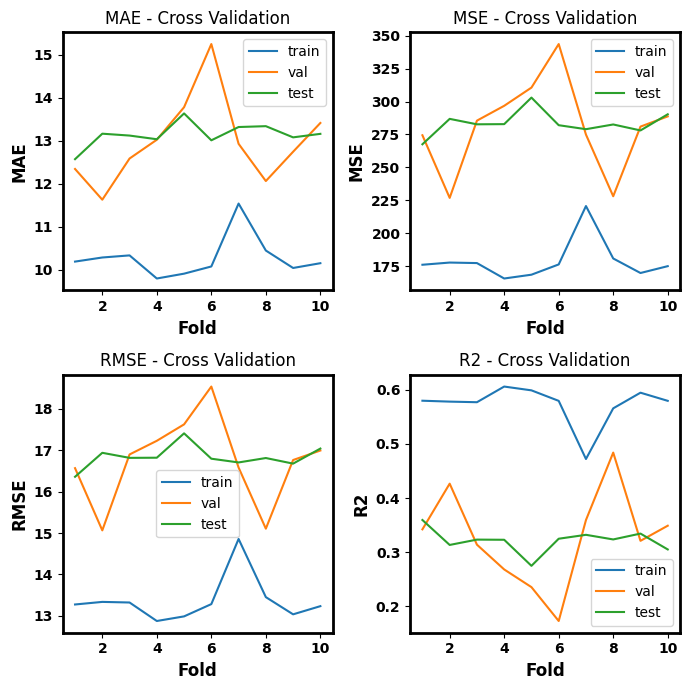

In [16]:
Plotters.plot_metricas_evaluacion(results, labels=labels, name_set='Cross Validation')

# Best Fold

Se toma el modelo que tiene un menor MAE en validación

In [17]:
mae_list = results['val']['mae']
min_mae_index = mae_list.index(min(mae_list))

y_labels_=results_per_fold_CN_test[min_mae_index]['y_labels']
y_pred_= results_per_fold_CN_test[min_mae_index]['y_pred_corrected']


                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     577.3
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           2.73e-68
Time:                        22:51:15   Log-Likelihood:                -1032.2
No. Observations:                 265   AIC:                             2068.
Df Residuals:                     263   BIC:                             2076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5165      1.978      3.801      0.0

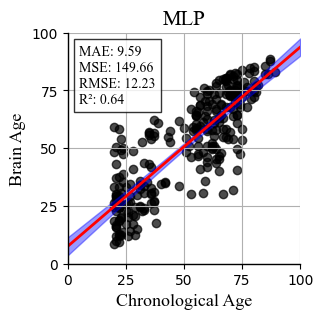

Error medio absoluto: 9.587840882774376
Error cuadrático medio: 149.65908281972264
Raíz del error cuadrático medio: 12.233522911235449
Coeficiente de determinación (R²): 0.6416829928451164


In [18]:
Plotters.plot_regresion(y=y_pred_,x= y_labels_, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

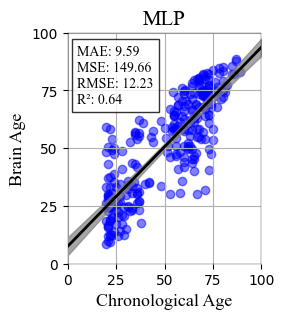

Error medio absoluto: 9.587840882774376
Error cuadrático medio: 149.65908281972264
Raíz del error cuadrático medio: 12.233522911235449
Coeficiente de determinación (R²): 0.6416829928451164


In [19]:
Plotters.plot_regresion(y=y_pred_,x= y_labels_, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color=colorset, title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2.5,y_size=3, legend=False, fontsize=13, mode=3, legend_metrics=True)

# Simple SHAP

In [20]:
X_CN_test = df_test.iloc[:, :-2]  # Features
y_CN_test = df_test.iloc[:, -2]   # Labels (Age)
ID_CN_test = df_test.iloc[:, -1]

ID_fold = results_per_fold_CN_train[min_mae_index]['ID-unique']
df_train_fold = df_concatenado_CN[df_concatenado_CN['ID-unique'].isin(ID_fold)]

X_train_kf_CN = df_train_fold.iloc[:, :-2]  # Features
y_train_kf_CN = df_train_fold.iloc[:, -2]   # Labels (Age)
id_train_kf_CN = df_train_fold.iloc[:, -1]

mean_X_train_kf = X_train_kf_CN.mean()
std_X_train_kf = X_train_kf_CN.std()
min_X_train_kf = X_train_kf_CN.min()
max_X_train_kf = X_train_kf_CN.max()

#mean_X_train_kf=results_model['mean_X_train_kf'][min_mae_index]
#std_X_train_kf=results_model['std_X_train_kf'][min_mae_index]

best_model = results_model['model'][min_mae_index]

# Z-score
X_train_kf_CN_scaled= (X_train_kf_CN - mean_X_train_kf) / std_X_train_kf
X_test_CN_scaled = (X_CN_test - mean_X_train_kf) / std_X_train_kf

#MinMax
#X_train_kf_scaled = (X_train_kf_CN - min_X_train_kf) / (max_X_train_kf - min_X_train_kf)
#X_test_CN_scaled = (X_CN_test - min_X_train_kf) / (max_X_train_kf - min_X_train_kf)



In [ ]:
simple_shap_values, simple_shap_summary_sorted = model.calculate_simple_shap(X_train=X_train_kf_CN_scaled, X_test=X_test_CN_scaled, model=best_model)

In [ ]:
with open('results_model/simple_shap_summary_sorted.pkl', 'wb') as f:
    pickle.dump(simple_shap_summary_sorted, f)

with open('results_model/simple_shap_values_avg_array.pkl', 'wb') as f:
    pickle.dump(simple_shap_values, f)

In [23]:
with open('results_model/simple_shap_summary_sorted.pkl', 'rb') as f:
    simple_shap_summary_sorted = pickle.load(f)

with open('results_model/simple_shap_values_avg_array.pkl', 'rb') as f:
    simple_shap_values = pickle.load(f)


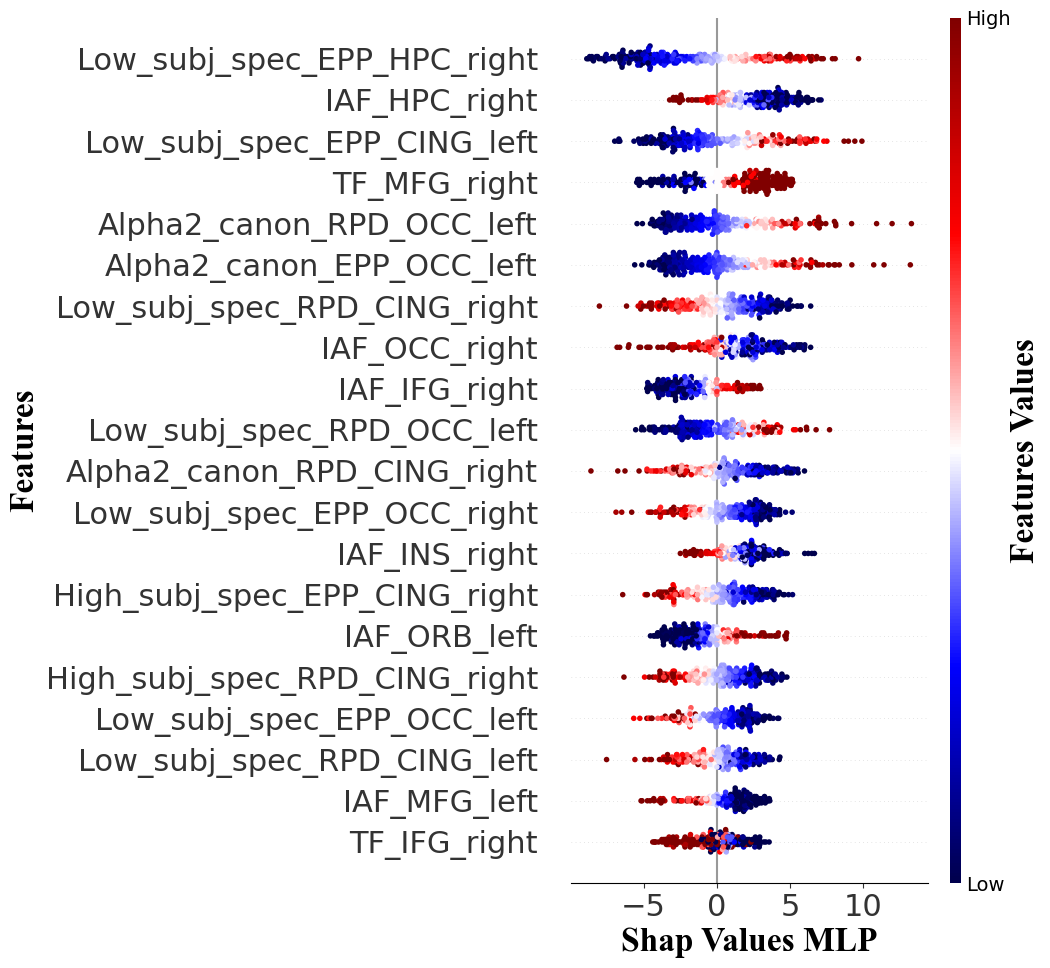

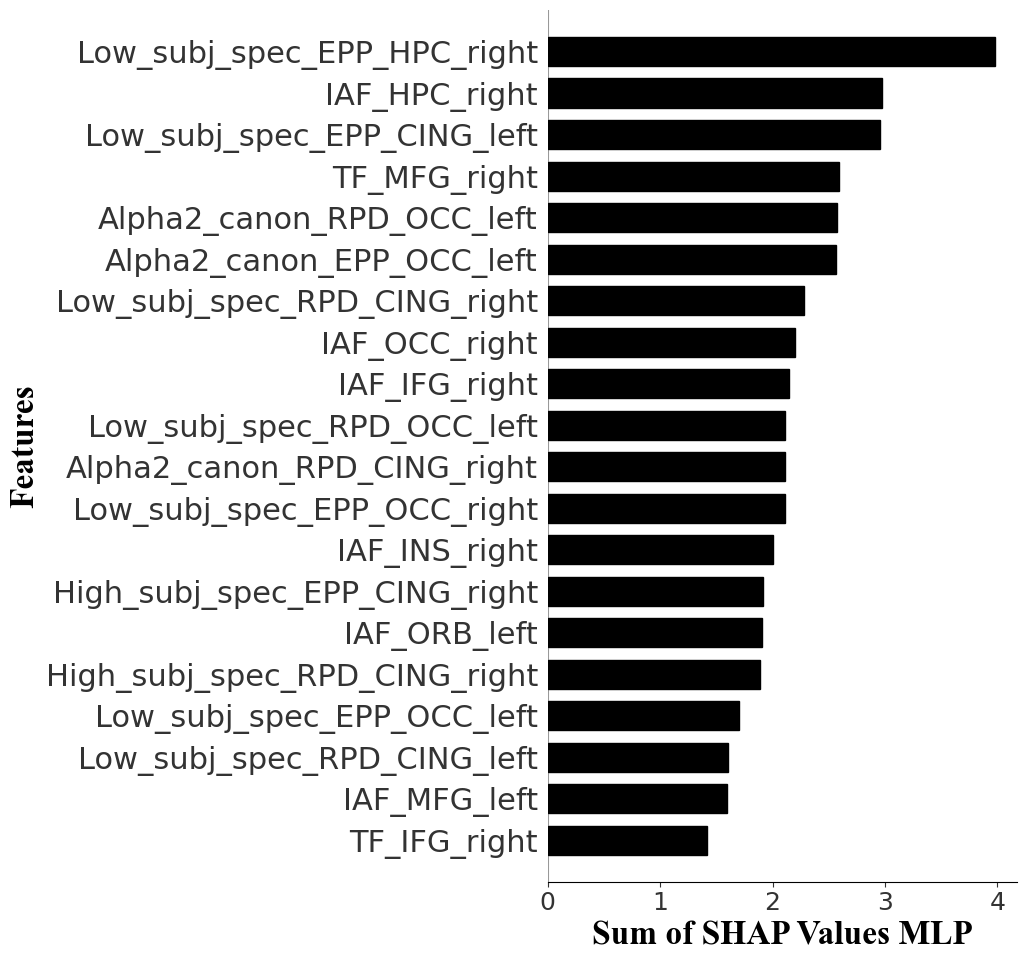

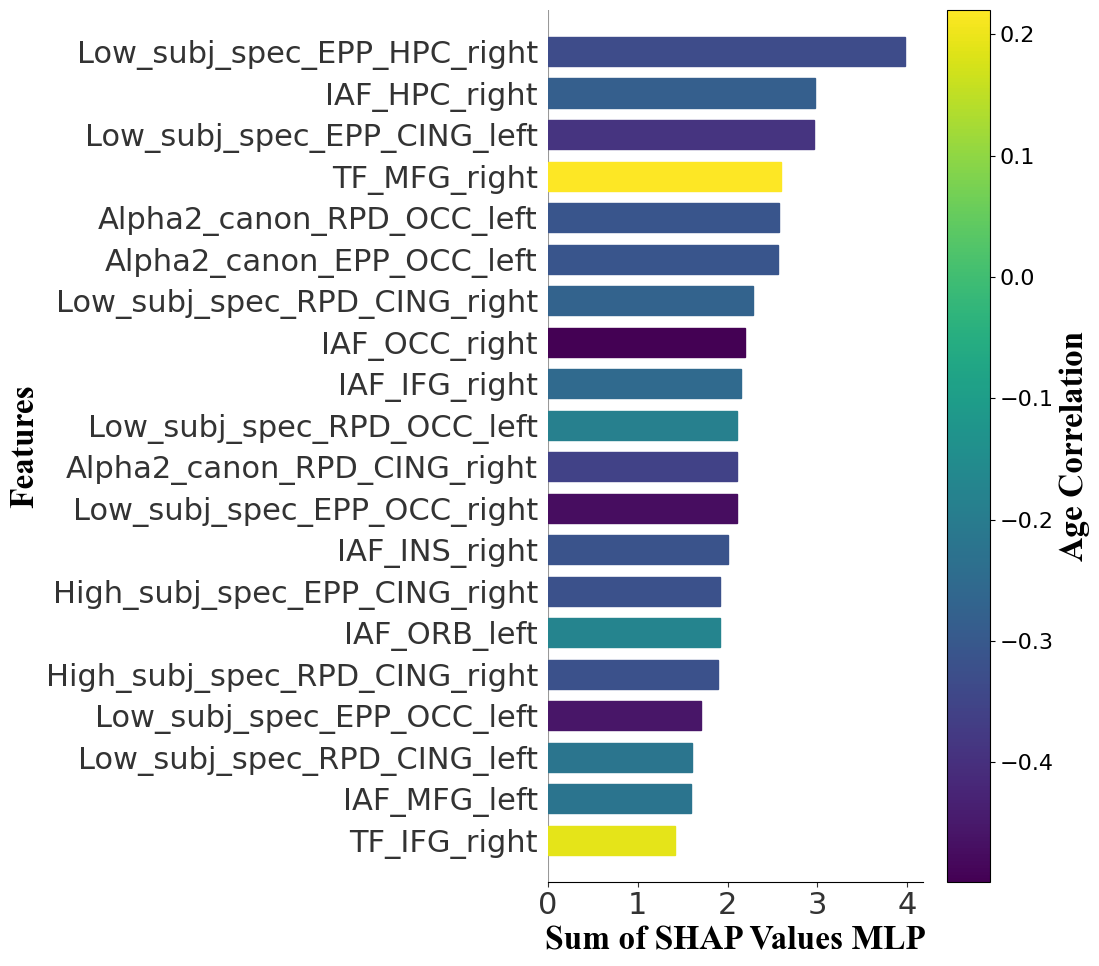

In [24]:
Plotters.plot_feature_importance(shap_values=simple_shap_values,X_test=X_test_CN_scaled,y_test=y_CN_test, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [25]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=simple_shap_summary_sorted, num_max=20)

OCC_left: 1.000000
CING_right: 0.915726
HPC_right: 0.776358
CING_left: 0.509752
OCC_right: 0.481221
IFG_right: 0.398166
MFG_right: 0.289325
INS_right: 0.223900
ORB_left: 0.213474
MFG_left: 0.178504


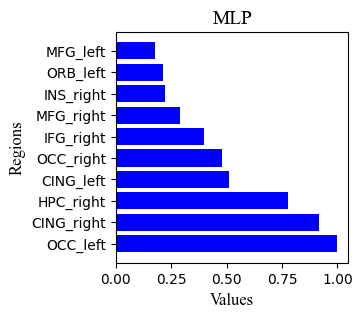

In [26]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


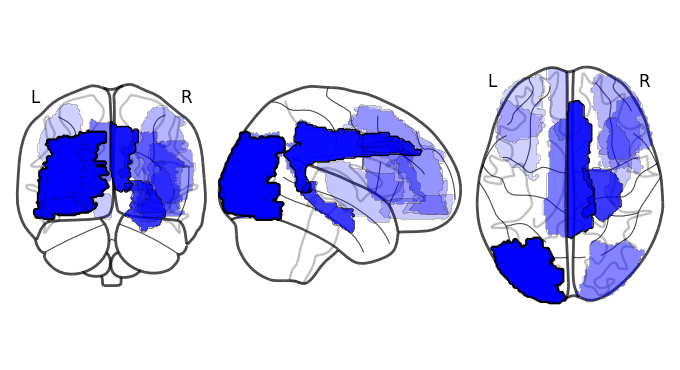

In [27]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)

# Taining 20-Iteration 10-Kfold 100%data

Se entrena y se evalua con todos los datos utilizando validación cruzada y múltiples iteraciones

In [ ]:
results_labels_df_CN_train,results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train,results_per_fold_CN_test, results_per_fold_pat= model.trainer(df_CN=df_concatenado_CN, n_splits=10, n_iterations=20, params_=best_params_[0], scaler=Scaler)

C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:233: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([results_labels_df_CN_train, temp_CN_df_train], ignore_index=True)
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:235: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_te

In [ ]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, 
           results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat]

with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [ ]:
with open('results_model/resultados_modelo.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Acceder a los objetos
results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat = loaded_results

In [ ]:
results_labels_df_total = [results_labels_df_CN_test]
results_avg_list = model.avg_list(results_labels_df_total)


In [ ]:
results_avg_list_CN = results_avg_list[0]
df_CN_seleccion = df_CN_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = results_avg_list_CN.merge(df_CN_seleccion, on='ID-unique', how='left')


In [ ]:
df_CN_results.to_excel('results/df_CN_results.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     5129.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:15:09   Log-Likelihood:                -4941.7
No. Observations:                1323   AIC:                             9887.
Df Residuals:                    1321   BIC:                             9898.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3230      0.704      1.879      0.0

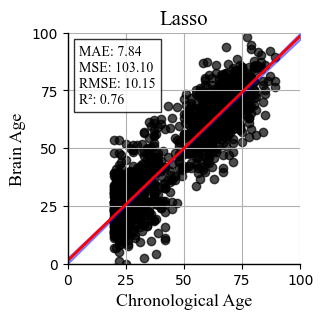

Error medio absoluto: 7.842393640976491
Error cuadrático medio: 103.09641993218908
Raíz del error cuadrático medio: 10.153640723020935
Coeficiente de determinación (R²): 0.7558007044013019


In [ ]:
Plotters.plot_regresion(y=results_avg_list[0]['y_pred_corrected'],x= results_avg_list[0]['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='Lasso',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

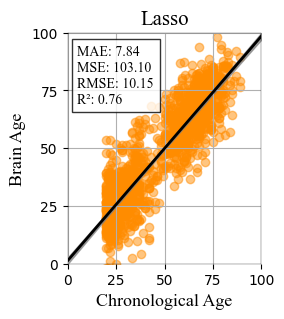

Error medio absoluto: 7.842393640976491
Error cuadrático medio: 103.09641993218908
Raíz del error cuadrático medio: 10.153640723020935
Coeficiente de determinación (R²): 0.7558007044013019


In [ ]:
Plotters.plot_regresion(y=results_avg_list[0]['y_pred_corrected'],x= results_avg_list[0]['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color=colorset, title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2.5,y_size=3, legend=False, fontsize=13, mode=3, legend_metrics=True)

# Multiple SHAP

In [ ]:
multiple_shap_values_CN, multiple_shap_summary_sorted_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN, results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'], slice(None, -2),scaler=Scaler
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 13447.095370078923
High_subj_spec_EPP_OCC_left: 7039.885003721599
Low_subj_spec_RPD_CING_right: 6037.485363315451
Low_subj_spec_RPD_PARIET_left: 5790.006349336026
High_subj_spec_RPD_OCC_left: 5240.840761764556
Low_subj_spec_EPP_CING_left: 5114.648015096693
Alpha2_canon_EPP_HPC_left: 4517.647981390074
Low_subj_spec_EPP_HPC_left: 4213.979280752843
Low_subj_spec_RPD_CING_left: 4105.66446143213
High_subj_spec_RPD_CING_left: 3953.8683373832187
Low_subj_spec_EPP_HPC_right: 3505.736065907141
Low_subj_spec_EPP_PARIET_left: 3493.252760001082
Low_subj_spec_RPD_PARIET_right: 3244.4535717823915
IAF_OCC_right: 3110.009270430868
High_subj_spec_RPD_HPC_right: 3014.9917669747097
Alpha2_canon_EPP_OCC_left: 3009.8410166347203
Alpha2_canon_RPD_OCC_left: 2928.444705246186
TF_MFG_right: 2777.675330330857
IAF_INS_right: 2681.898849483991
Low_subj_spec_EPP_OCC_left: 2445.598164544968
IAF_IFG_right: 2243.793796110775
Hi

In [ ]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(multiple_shap_summary_sorted_CN, f)

with open('results_model/multiple_shap_values_CN.pkl', 'wb') as f:
    pickle.dump(multiple_shap_values_CN, f)

In [ ]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    multiple_shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    multiple_shap_values_CN = pickle.load(f)


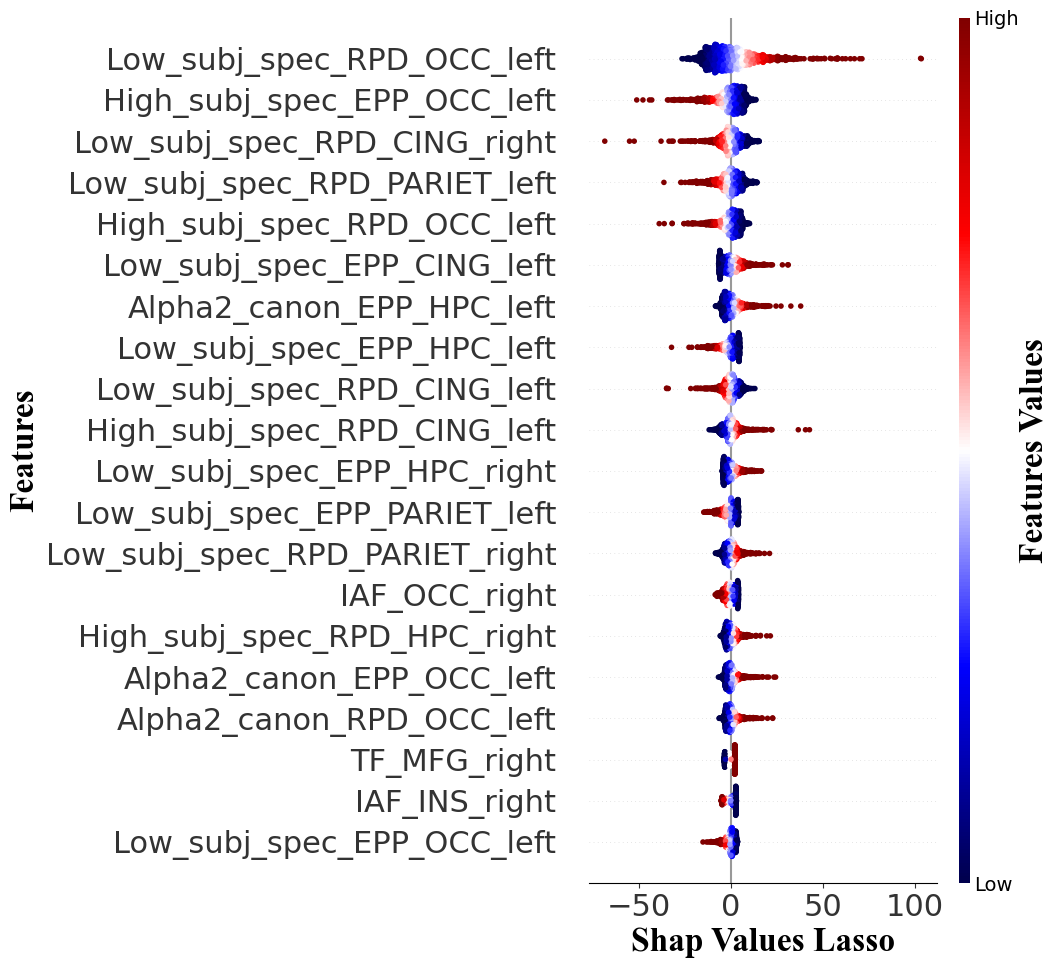

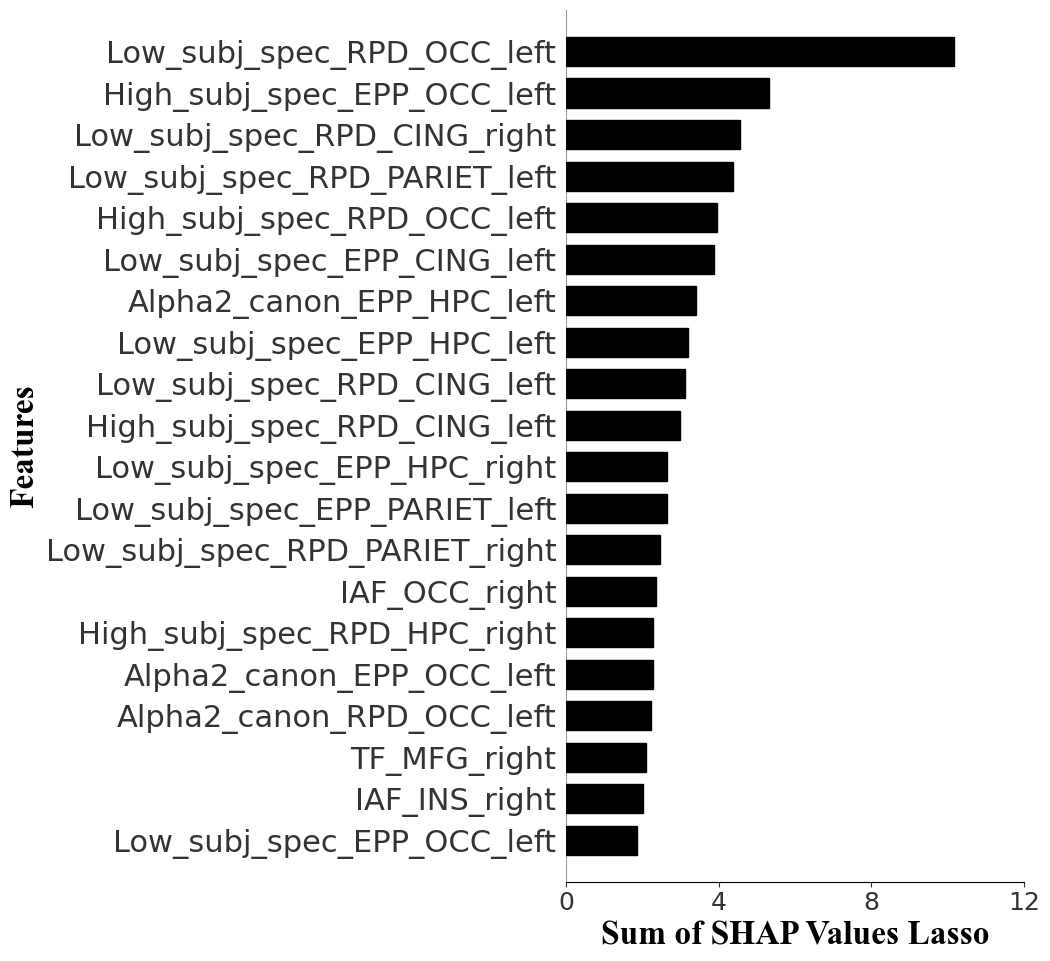

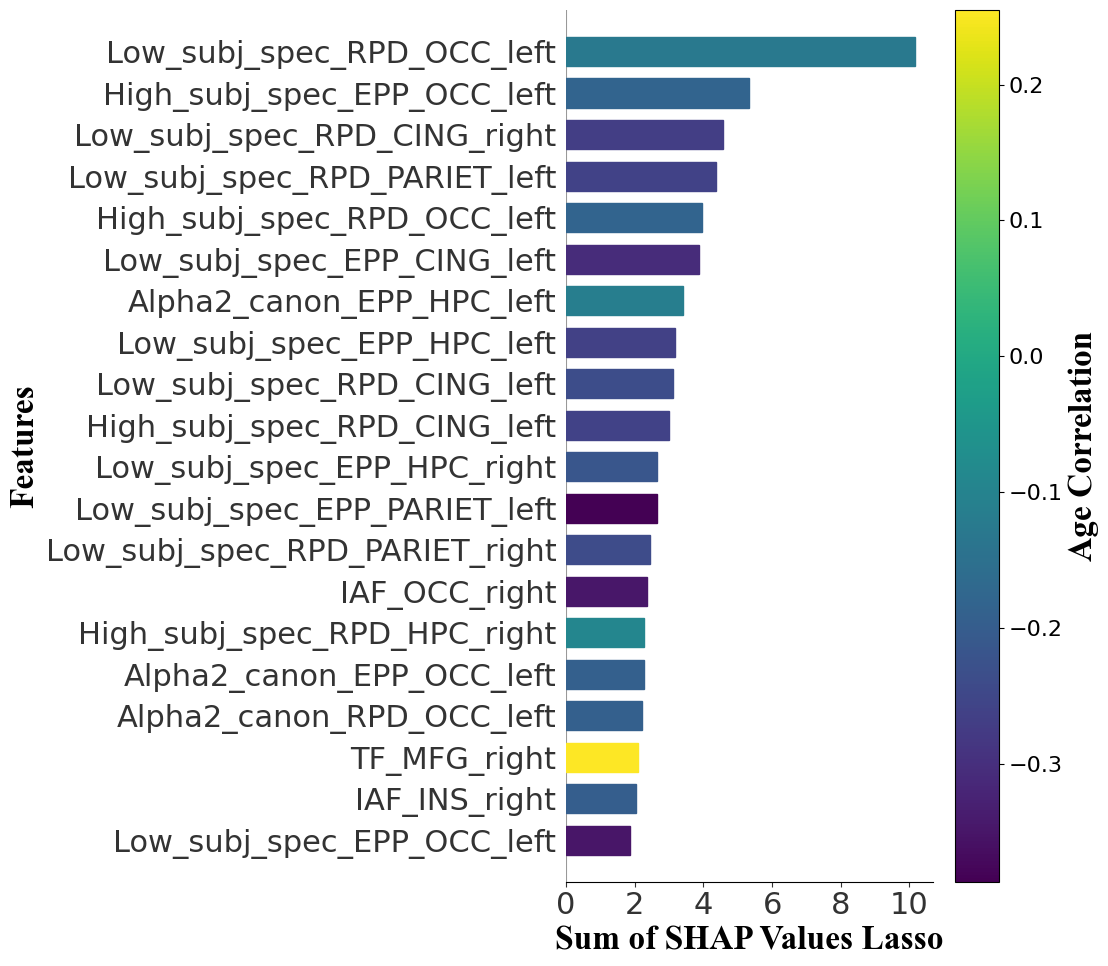

In [ ]:
Plotters.plot_feature_importance(shap_values=multiple_shap_values_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [ ]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=multiple_shap_summary_sorted_CN, num_max=20)

OCC_left: 1.000000
CING_left: 0.386207
PARIET_left: 0.272143
HPC_left: 0.255972
HPC_right: 0.191158
CING_right: 0.176992
PARIET_right: 0.095113
OCC_right: 0.091171
MFG_right: 0.081429
INS_right: 0.078621


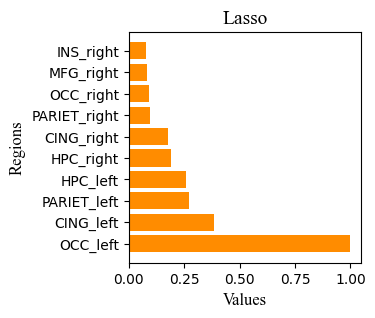

In [ ]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


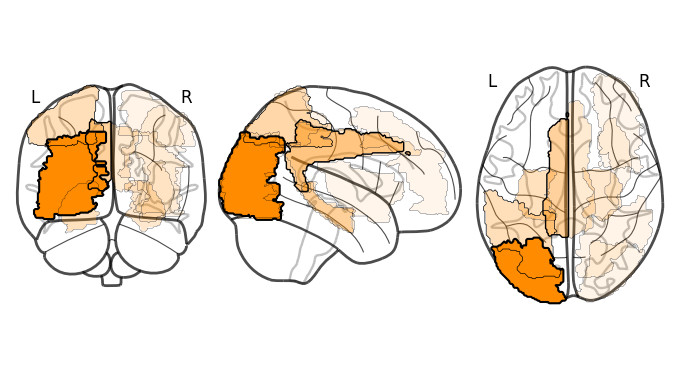

In [ ]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)